# Prep Course Capstone - Uncovering a road to Manchester City's Championship season (and what Liverpool can do to catch up)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data

The dataset I am working with is an aggregation from the 2016/17 and 2017/18 English Premier League seasons (soccer/football). The data was released by Football-Data.co.uk in 2 different csv files. The data represents statistics from all matches played in both seasons. The significance of looking at only 2 seasons is because the manager of Manchester City took over in the former season. Liverpool's coach was also the same in that period. 

In the 16/17 season, Manchester City ended 3rd on 78 points. Liverpool ended 4th on 76 points. However, in the 17/18 season Manchester City ended 1st on 100 points, while Liverpool stayed in 4th on 75 points. What changed? While this data will not uncover all of the reasons behind Manchester City's championship season in 17/18, it will provide a look into a slice. 

The reason this dataset interests me is because as an LFC (Liverpool FC) fan, I'm curious to see what LFC will need to do in order to make the step up and win the league.

The English Premier league also does not have a playoff system like most, if not all, American sports. The title (or championship) goes to the team with the most points after the 38 game season. A team receives 3 points for a win, 1 for a tie, and 0 for a loss.

The data contains game date, home team, away team, Full Time Home Team Goals, Full Time Away Team Goals,  Full Time Result, Half Time Home Team Goals, Half Time Away Team Goals, Half Time Result, Match Referee, Home Team Shots, Away Team Shots, Home Team Shots on Target, Away Team Shots on Target, Home Team Hit Woodwork, Away Team Hit Woodwork, Home Team Corners, Away Team Corners, Home Team Fouls Committed, Away Team Fouls Committed, Home Team Free Kicks Conceded, Away Team Free Kicks Conceded, Home Team Offsides, Away Team Offsides, Home Team Yellow Cards, Away Team Yellow Cards, Home Team Red Cards, Away Team Red Cards

In [4]:
#load data
teams = pd.read_csv("pl1718.csv")
#plt.figure(figsize=(5,5))
#pg = sns.heatmap(pl.corr(), annot=True, cmap='Blues')
#plt.show()

In [5]:
#data prep
#create buckets for the numbers
home_city = []
away_city = []
home_lfc = []
away_lfc = []
#rest of league
home_rol = []
away_rol = []

#iterate over the teams df and pull out all rows related to either Man City or Liverpool. 
# splits them into home and away game sets
for index, row in teams.iterrows():
    if row['HomeTeam'] == 'Man City':
        home_city.append(row)
    elif row['HomeTeam'] == 'Liverpool':
        home_lfc.append(row)
    else:
        home_rol.append(row)

    if row['AwayTeam'] == 'Man City':
        away_city.append(row)
    elif row['AwayTeam'] == 'Liverpool':
        away_lfc.append(row)
    else:
        away_rol.append(row)

In [6]:
#go through and pull out goals and put them into a list
home_goals_city = []
for hw in home_city:
    home_goals_city.append(hw[4])
    
home_goals_lfc = []
for hw in home_lfc:
    home_goals_lfc.append(hw[4])
    
home_goals_rol = []
for hw in home_rol:
    home_goals_rol.append(hw[4])
    
away_goals_city = []
for hw in away_city:
    away_goals_city.append(hw[5])

away_goals_lfc = []
for hw in away_lfc:
    away_goals_lfc.append(hw[5])
    
away_goals_rol = []
for hw in away_rol:
    away_goals_rol.append(hw[5])
    
home_goals_against_city = []
for hw in home_city:
    home_goals_against_city.append(hw[5])

home_goals_against_lfc = []
for hw in home_lfc:
    home_goals_against_lfc.append(hw[5])

home_goals_against_rol = []
for hw in home_rol:
    home_goals_against_rol.append(hw[5])
    
away_goals_against_city = []
for hw in away_city:
    away_goals_against_city.append(hw[4])

away_goals_against_lfc = []
for hw in away_lfc:
    away_goals_against_lfc.append(hw[4])
    
away_goals_against_rol = []
for hw in away_rol:
    away_goals_against_rol.append(hw[4])

# Analytics

## 1. How did Manchester City fare in the 16/17 season? What areas did they do significantly better in 17/18?


In [7]:
#Put rest of league numbers
home_goals_rol_17 = home_goals_rol[19:]
home_goals_rol_18 = home_goals_rol[:19]
away_goals_rol_17 = away_goals_rol[19:]
away_goals_rol_18 = away_goals_rol[:19]
home_goals_against_rol_17 = home_goals_against_rol[19:]
home_goals_against_rol_18 = home_goals_against_rol[:19]
away_goals_against_rol_17 = away_goals_against_rol[19:]
away_goals_against_rol_18 = away_goals_against_rol[:19]

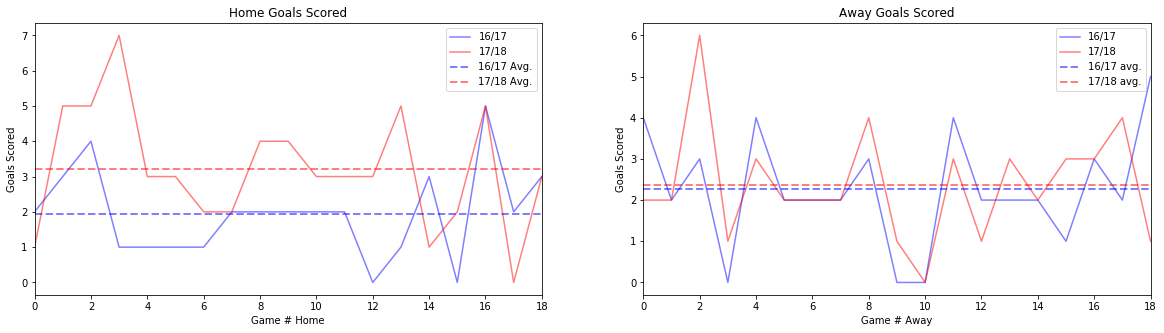

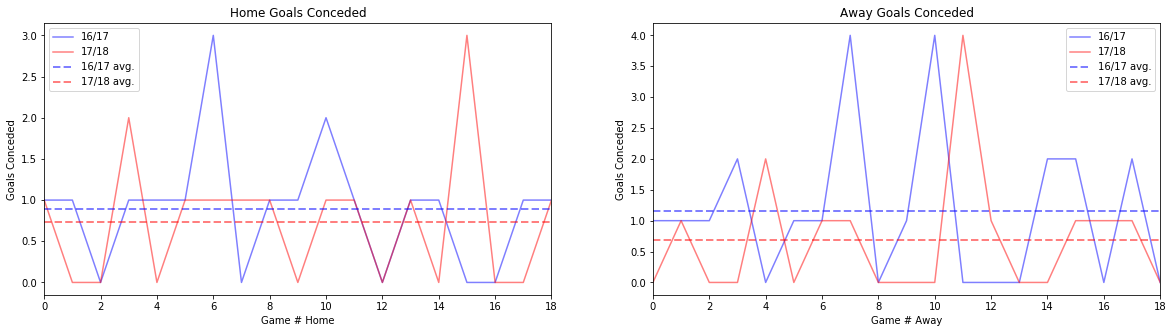

In [9]:
#one of the first things to look at would be goals scored and conceded split by home and away. 
#This would help uncover a trend if a team is potentially really good/bad at home or away
#let's split the data into their respective seasons

#Man City
home_goals_city_17 = home_goals_city[19:]
home_goals_city_18 = home_goals_city[:19]
away_goals_city_17 = away_goals_city[19:]
away_goals_city_18 = away_goals_city[:19]
home_goals_against_city_17 = home_goals_against_city[19:]
home_goals_against_city_18 = home_goals_against_city[:19]
away_goals_against_city_17 = away_goals_against_city[19:]
away_goals_against_city_18 = away_goals_against_city[:19]


#home_goals_lfc_17 = home_goals_lfc.loc[home_goals_lfc["Season"] == 17]
#home_goals_rol_17 = home_goals_rol.loc[home_goals_rol["Season"] == 17]

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
#plot both teams home goals
plt.plot(home_goals_city_17, color='blue', alpha=.5, label="16/17")
plt.plot(home_goals_city_18, color='red', alpha=.5, label="17/18")
#enter our labels for clarity
plt.title("Home Goals Scored")
plt.xlabel("Game # Home")
plt.ylabel("Goals Scored")
#limit the plot to have correct game numbers and get rid of .5 numbers
plt.xlim(0,18)
#add horizontal lines for mean
plt.axhline(np.mean(home_goals_city_17), color='b', linestyle='dashed', linewidth=2,label='16/17 Avg.', alpha=0.5)
plt.axhline(np.mean(home_goals_city_18), color='r', linestyle='dashed', linewidth=2,label='17/18 Avg.', alpha=0.5)
#plt.axhline(np.mean(home_goals_rol), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()


plt.subplot(1,2,2)
#plot both teams away goals
plt.plot(away_goals_city_17,color='blue', alpha=.5, label="16/17")
plt.plot(away_goals_city_18, color='red', alpha=.5, label="17/18")
#enter our labels for clarity
plt.title("Away Goals Scored")
plt.xlabel("Game # Away")
plt.ylabel("Goals Scored")
#limit the plot to have correct game numbers and get rid of .5 numbers
plt.xlim(0,18)
#add horizontal lines for mean
plt.axhline(np.mean(away_goals_city_17), color='b', linestyle='dashed', linewidth=2,label='16/17 avg.', alpha=0.5)
plt.axhline(np.mean(away_goals_city_18), color='r', linestyle='dashed', linewidth=2,label='17/18 avg.', alpha=0.5)
#plt.axhline(np.mean(away_goals_rol_17), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
#plot both teams home goals conceded
plt.plot(home_goals_against_city_17, color='blue', alpha=.5, label="16/17")
plt.plot(home_goals_against_city_18, color='red', alpha=.5, label="17/18")
plt.title("Home Goals Conceded")
plt.xlabel("Game # Home")
plt.xlim(0,18)
plt.ylabel("Goals Conceded")
plt.axhline(np.mean(home_goals_against_city_17), color='b', linestyle='dashed', linewidth=2,label='16/17 avg.', alpha=0.5)
plt.axhline(np.mean(home_goals_against_city_18), color='r', linestyle='dashed', linewidth=2,label='17/18 avg.', alpha=0.5)
#plt.axhline(np.mean(home_goals_against_rol), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()


plt.subplot(1,2,2)
#plot both teams away goals conceded
plt.plot(away_goals_against_city_17,color='blue', alpha=.5, label="16/17")
plt.plot(away_goals_against_city_18, color='red', alpha=.5, label="17/18")
plt.title("Away Goals Conceded")
plt.xlabel("Game # Away")
plt.xlim(0,18)
plt.ylabel("Goals Conceded")
plt.axhline(np.mean(away_goals_against_city_17), color='b', linestyle='dashed', linewidth=2,label='16/17 avg.', alpha=0.5)
plt.axhline(np.mean(away_goals_against_city_18), color='r', linestyle='dashed', linewidth=2,label='17/18 avg.', alpha=0.5)
#plt.axhline(np.mean(away_goals_against_rol), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()





In [18]:
#Let's look at differences in goals from year to year
print("Home Goals Scored Totals: 16/17 - ", np.sum(home_goals_city_17), " 17/18 - ", np.sum(home_goals_city_18))
print("Home Goals Scored Difference - ", np.sum(home_goals_city_18) - np.sum(home_goals_city_17))

print("Home Goals Conceded Totals: 16/17 - ", np.sum(home_goals_against_city_17), " 17/18 - ", np.sum(home_goals_against_city_18))
print("Home Goals Conceded Difference - ", np.sum(home_goals_against_city_18) - np.sum(home_goals_against_city_17))

print("Away Goals Scored Totals: 16/17 - ", np.sum(away_goals_city_17), " 17/18 - ", np.sum(away_goals_city_18))
print("Away Goals Scored Difference - ", np.sum(away_goals_city_18) - np.sum(away_goals_city_17))

print("Away Goals Conceded Totals: 16/17 - ", np.sum(away_goals_against_city_17), " 17/18 - ", np.sum(away_goals_against_city_18))
print("Away Goals Conceded Difference - ", np.sum(away_goals_against_city_18) - np.sum(away_goals_against_city_17))

Home Goals Scored Totals: 16/17 -  37  17/18 -  61
Home Goals Scored Difference -  24
Home Goals Conceded Totals: 16/17 -  17  17/18 -  14
Home Goals Conceded Difference -  -3
Away Goals Scored Totals: 16/17 -  43  17/18 -  45
Away Goals Scored Difference -  2
Away Goals Conceded Totals: 16/17 -  22  17/18 -  13
Away Goals Conceded Difference -  -9


### Conclusion: Manchester City improved in all areas. They significantly improved in goals scored at home by adding 24 goals. They conceded 9 goals less away while slightly improving by scoring 2 more goals. 

## 2. How did Liverpool fare in the 16/17 season? What areas did they lack in that allowed Manchester City to have 25 points more at the end of the season?


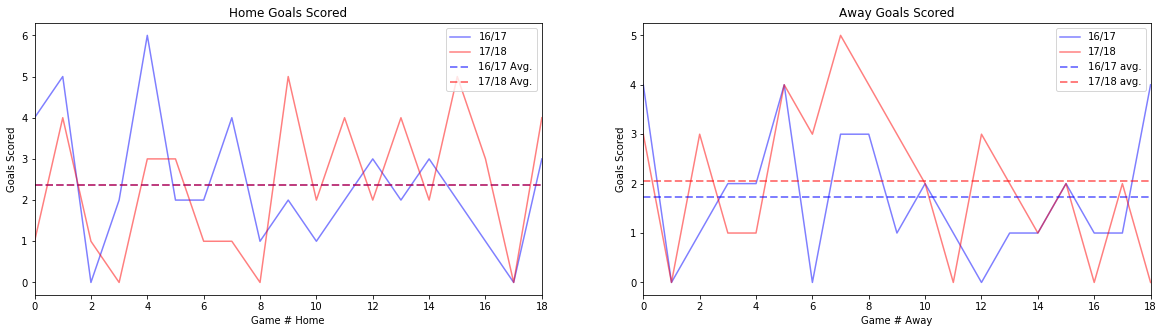

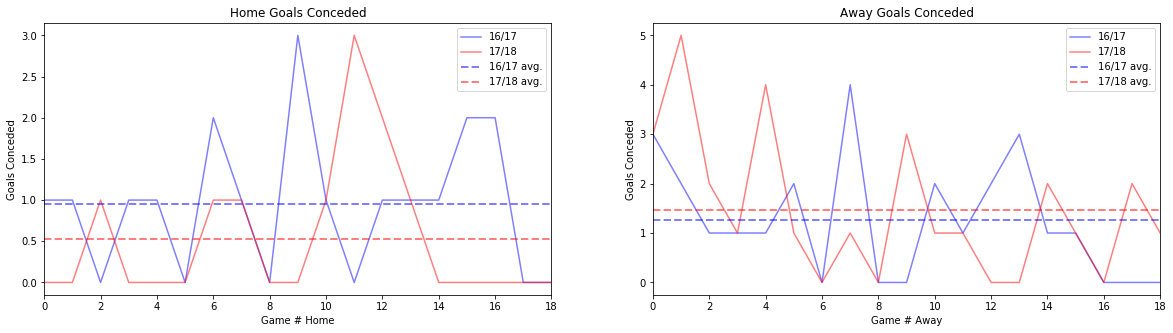

In [13]:
#one of the first things to look at would be goals scored and conceded split by home and away. 
#This would help uncover a trend if a team is potentially really good/bad at home or away
#let's split the data into their respective seasons

#lfc
home_goals_lfc_17 = home_goals_lfc[19:]
home_goals_lfc_18 = home_goals_lfc[:19]
away_goals_lfc_17 = away_goals_lfc[19:]
away_goals_lfc_18 = away_goals_lfc[:19]
home_goals_against_lfc_17 = home_goals_against_lfc[19:]
home_goals_against_lfc_18 = home_goals_against_lfc[:19]
away_goals_against_lfc_17 = away_goals_against_lfc[19:]
away_goals_against_lfc_18 = away_goals_against_lfc[:19]


plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
#plot both teams home goals
plt.plot(home_goals_lfc_17, color='blue', alpha=.5, label="16/17")
plt.plot(home_goals_lfc_18, color='red', alpha=.5, label="17/18")
#enter our labels for clarity
plt.title("Home Goals Scored")
plt.xlabel("Game # Home")
plt.ylabel("Goals Scored")
#limit the plot to have correct game numbers and get rid of .5 numbers
plt.xlim(0,18)
#add horizontal lines for mean
plt.axhline(np.mean(home_goals_lfc_17), color='b', linestyle='dashed', linewidth=2,label='16/17 Avg.', alpha=0.5)
plt.axhline(np.mean(home_goals_lfc_18), color='r', linestyle='dashed', linewidth=2,label='17/18 Avg.', alpha=0.5)
#plt.axhline(np.mean(home_goals_rol), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()


plt.subplot(1,2,2)
#plot both teams away goals
plt.plot(away_goals_lfc_17,color='blue', alpha=.5, label="16/17")
plt.plot(away_goals_lfc_18, color='red', alpha=.5, label="17/18")
#enter our labels for clarity
plt.title("Away Goals Scored")
plt.xlabel("Game # Away")
plt.ylabel("Goals Scored")
#limit the plot to have correct game numbers and get rid of .5 numbers
plt.xlim(0,18)
#add horizontal lines for mean
plt.axhline(np.mean(away_goals_lfc_17), color='b', linestyle='dashed', linewidth=2,label='16/17 avg.', alpha=0.5)
plt.axhline(np.mean(away_goals_lfc_18), color='r', linestyle='dashed', linewidth=2,label='17/18 avg.', alpha=0.5)
#plt.axhline(np.mean(away_goals_rol), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
#plot both teams home goals conceded
plt.plot(home_goals_against_lfc_17, color='blue', alpha=.5, label="16/17")
plt.plot(home_goals_against_lfc_18, color='red', alpha=.5, label="17/18")
plt.title("Home Goals Conceded")
plt.xlabel("Game # Home")
plt.xlim(0,18)
plt.ylabel("Goals Conceded")
plt.axhline(np.mean(home_goals_against_lfc_17), color='b', linestyle='dashed', linewidth=2,label='16/17 avg.', alpha=0.5)
plt.axhline(np.mean(home_goals_against_lfc_18), color='r', linestyle='dashed', linewidth=2,label='17/18 avg.', alpha=0.5)
#plt.axhline(np.mean(home_goals_against_rol), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()


plt.subplot(1,2,2)
#plot both teams away goals conceded
plt.plot(away_goals_against_lfc_17,color='blue', alpha=.5, label="16/17")
plt.plot(away_goals_against_lfc_18, color='red', alpha=.5, label="17/18")
plt.title("Away Goals Conceded")
plt.xlabel("Game # Away")
plt.xlim(0,18)
plt.ylabel("Goals Conceded")
plt.axhline(np.mean(away_goals_against_lfc_17), color='b', linestyle='dashed', linewidth=2,label='16/17 avg.', alpha=0.5)
plt.axhline(np.mean(away_goals_against_lfc_18), color='r', linestyle='dashed', linewidth=2,label='17/18 avg.', alpha=0.5)
#plt.axhline(np.mean(away_goals_against_rol), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()

In [19]:
#Let's look at differences in goals from year to year
print("Home Goals Scored Totals: 16/17 - ", np.sum(home_goals_lfc_17), " 17/18 - ", np.sum(home_goals_lfc_18))
print("Home Goals Scored Difference - ", np.sum(home_goals_lfc_18) - np.sum(home_goals_lfc_17))

print("Home Goals Conceded Totals: 16/17 - ", np.sum(home_goals_against_lfc_17), " 17/18 - ", np.sum(home_goals_against_lfc_18))
print("Home Goals Conceded Difference - ", np.sum(home_goals_against_lfc_18) - np.sum(home_goals_against_lfc_17))

print("Away Goals Scored Totals: 16/17 - ", np.sum(away_goals_lfc_17), " 17/18 - ", np.sum(away_goals_lfc_18))
print("Away Goals Scored Difference - ", np.sum(away_goals_lfc_18) - np.sum(away_goals_lfc_17))

print("Away Goals Conceded Totals: 16/17 - ", np.sum(away_goals_against_lfc_17), " 17/18 - ", np.sum(away_goals_against_lfc_18))
print("Away Goals Conceded Difference - ", np.sum(away_goals_against_lfc_18) - np.sum(away_goals_against_lfc_17))

Home Goals Scored Totals: 16/17 -  45  17/18 -  45
Home Goals Scored Difference -  0
Home Goals Conceded Totals: 16/17 -  18  17/18 -  10
Home Goals Conceded Difference -  -8
Away Goals Scored Totals: 16/17 -  33  17/18 -  39
Away Goals Scored Difference -  6
Away Goals Conceded Totals: 16/17 -  24  17/18 -  28
Away Goals Conceded Difference -  4


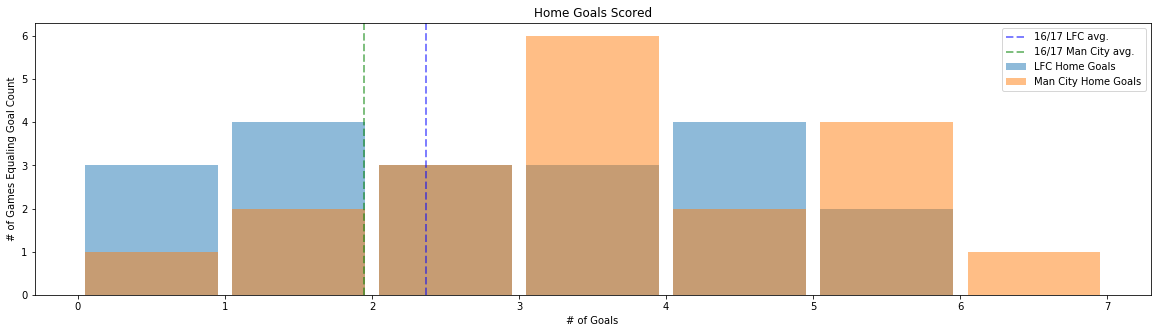

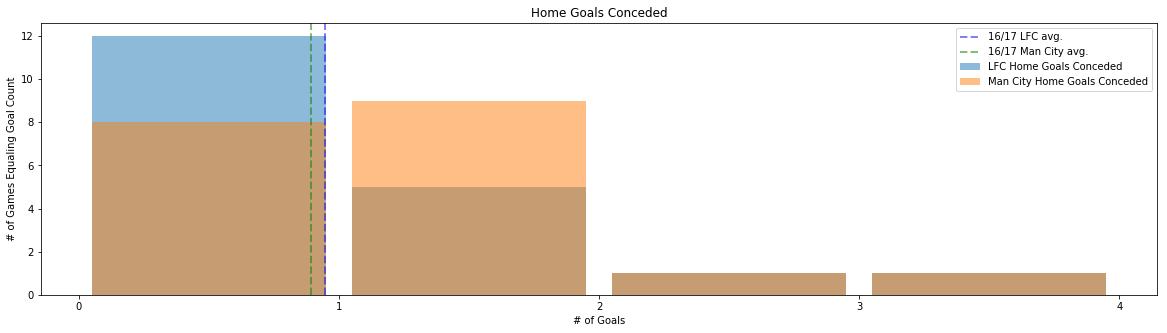

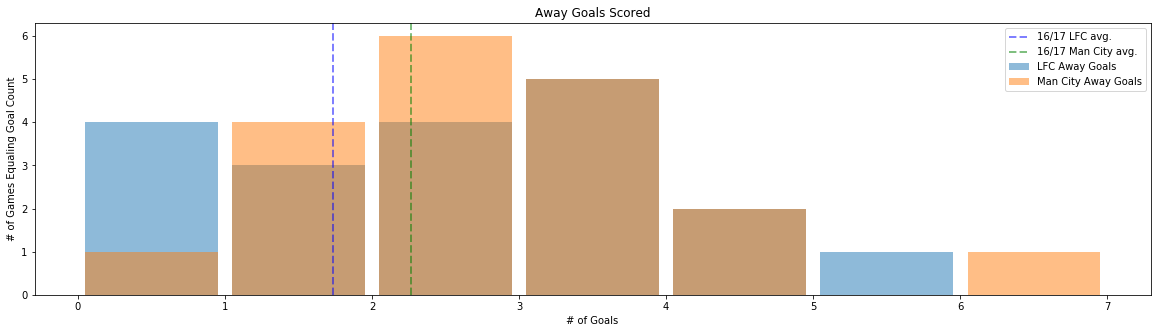

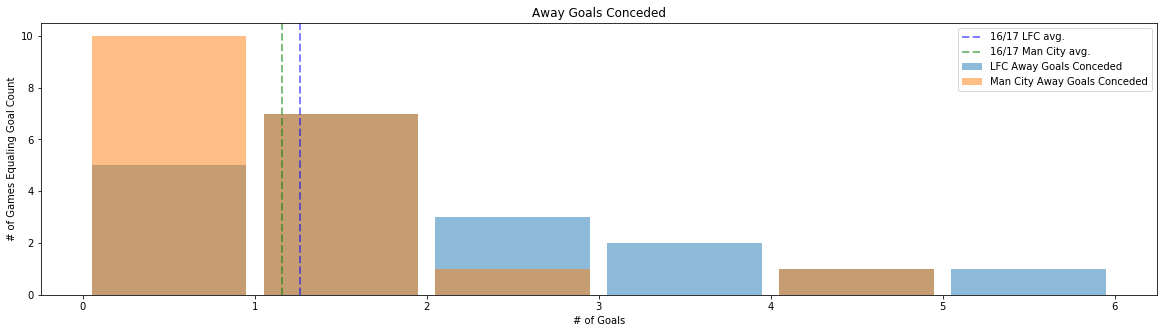

In [73]:
plt.figure(figsize=[20,5])
plt.hist(home_goals_lfc_18, bins=[0,1,2,3,4,5,6,7], rwidth=.9, alpha=0.5, label="LFC Home Goals")
plt.hist(home_goals_city_18, bins=[0,1,2,3,4,5,6,7], rwidth=.9, alpha=0.5, label="Man City Home Goals")
plt.axvline(np.mean(home_goals_lfc_17), color='b', linestyle='dashed', linewidth=2,label='16/17 LFC avg.', alpha=0.5)
plt.axvline(np.mean(home_goals_city_17), color='g', linestyle='dashed', linewidth=2,label='16/17 Man City avg.', alpha=0.5)
plt.title("Away Goals Conceded")
plt.title("Home Goals Scored")
plt.xlabel("# of Goals")
plt.ylabel("# of Games Equaling Goal Count")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.hist(home_goals_against_lfc_18, bins=[0,1,2,3,4], rwidth=.9, alpha=0.5, label="LFC Home Goals Conceded")
plt.hist(home_goals_against_city_18, bins=[0,1,2,3,4], rwidth=.9, alpha=0.5, label="Man City Home Goals Conceded")
plt.axvline(np.mean(home_goals_against_lfc_17), color='b', linestyle='dashed', linewidth=2,label='16/17 LFC avg.', alpha=0.5)
plt.axvline(np.mean(home_goals_against_city_17), color='g', linestyle='dashed', linewidth=2,label='16/17 Man City avg.', alpha=0.5)
plt.title("Away Goals Conceded")
plt.title("Home Goals Conceded")
plt.xticks([0,1,2,3,4])
plt.xlabel("# of Goals")
plt.ylabel("# of Games Equaling Goal Count")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.hist(away_goals_lfc_18, bins=[0,1,2,3,4,5,6,7], rwidth=.9, alpha=0.5, label="LFC Away Goals")
plt.hist(away_goals_city_18, bins=[0,1,2,3,4,5,6,7], rwidth=.9, alpha=0.5, label="Man City Away Goals")
plt.axvline(np.mean(away_goals_lfc_17), color='b', linestyle='dashed', linewidth=2,label='16/17 LFC avg.', alpha=0.5)
plt.axvline(np.mean(away_goals_city_17), color='g', linestyle='dashed', linewidth=2,label='16/17 Man City avg.', alpha=0.5)
plt.title("Away Goals Conceded")
plt.title("Away Goals Scored")
plt.xlabel("# of Goals")
plt.ylabel("# of Games Equaling Goal Count")
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.hist(away_goals_against_lfc_18, bins=[0,1,2,3,4,5,6], rwidth=.9, alpha=0.5, label="LFC Away Goals Conceded")
plt.hist(away_goals_against_city_18, bins=[0,1,2,3,4,5,6], rwidth=.9, alpha=0.5, label="Man City Away Goals Conceded")
plt.axvline(np.mean(away_goals_against_lfc_17), color='b', linestyle='dashed', linewidth=2,label='16/17 LFC avg.', alpha=0.5)
plt.axvline(np.mean(away_goals_against_city_17), color='g', linestyle='dashed', linewidth=2,label='16/17 Man City avg.', alpha=0.5)
plt.title("Away Goals Conceded")
plt.xlabel("# of Goals")
plt.ylabel("# of Games Equaling Goal Count")
plt.legend()
plt.show()

### How many times did both teams score above their 16/17 mean and concede less than their 16/17 mean?

In [101]:
city_goals_scored_home = [i for i in home_goals_city_18 if i < np.mean(home_goals_city_17)]
lfc_goals_scored_home = [i for i in home_goals_lfc_18 if i < np.mean(home_goals_lfc_17)]

city_goals_scored_away = [i for i in away_goals_city_18 if i < np.mean(away_goals_city_17)]
lfc_goals_scored_away = [i for i in away_goals_lfc_18 if i < np.mean(away_goals_lfc_17)]

city_goals_conceded_home = [i for i in home_goals_against_city_18 if i > np.mean(home_goals_against_city_17)]
lfc_goals_conceded_home = [i for i in home_goals_against_lfc_18 if i > np.mean(home_goals_against_lfc_17)]

city_goals_conceded_away = [i for i in away_goals_against_city_18 if i > np.mean(away_goals_against_city_17)]
lfc_goals_conceded_away = [i for i in away_goals_against_lfc_18 if i > np.mean(away_goals_against_lfc_17)]
print("# of Games - Goals scored at home (17/18) < 16/17 mean")
print("Man City - ",len(city_goals_scored_home))
print("LFC - ", len(lfc_goals_scored_home))
print()
print("# of Games - Goals scored away (17/18) < 16/17 mean")
print("Man City - ",len(city_goals_scored_away))
print("LFC - ",len(lfc_goals_scored_away))
print()
print("# of Games - Goals conceded at home (17/18) > 16/17 mean")
print("Man City - ",len(city_goals_conceded_home))
print("LFC - ",len(lfc_goals_conceded_home))
print()
print("# of Games - Goals conceded away (17/18) > 16/17 mean")
print("Man City - ",len(city_goals_conceded_away))
print("LFC - ",len(lfc_goals_conceded_away))


# of Games - Goals scored at home (17/18) < 16/17 mean
Man City -  3
LFC -  10

# of Games - Goals scored away (17/18) < 16/17 mean
Man City -  11
LFC -  7

# of Games - Goals conceded at home (17/18) > 16/17 mean
Man City -  11
LFC -  7

# of Games - Goals conceded away (17/18) > 16/17 mean
Man City -  2
LFC -  7


### Conclusion: The big jumps that Manchester City made from 16/17 to 17/18 were goals scored at home and goals conceded away. They only scored less than their 16/17 mean on 3 occasions while Liverpool did on 10. 

### Manchester City also only conceded more away goals than their 16/17 mean on 2 occasions while Liverpool did on 7.

### Since a win is worth 3 points, these add up over the season and cause such a large gap as we saw in the final standings (25 point gap)

## 3. As Manchester City had a huge jump in points over one season, how much was down to variables that would be considered as lucky?

### Was it just an unusual year where Manchester City got the rub of the green more times than not? Taking a look at shots hitting the post, for example, will reveal our answer

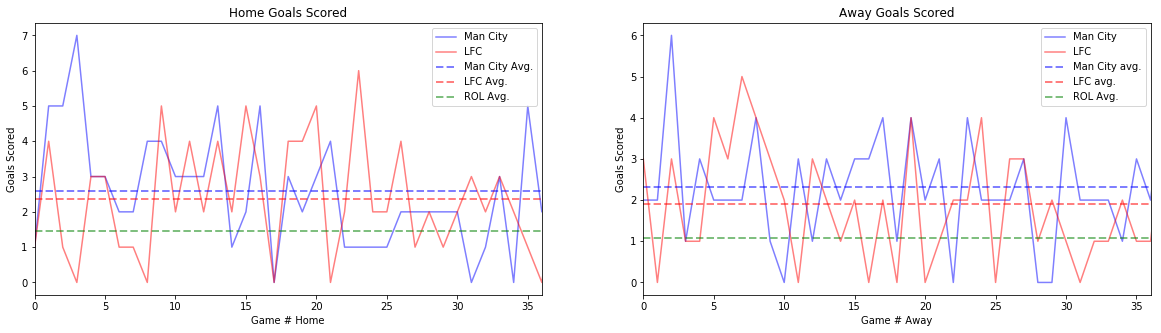

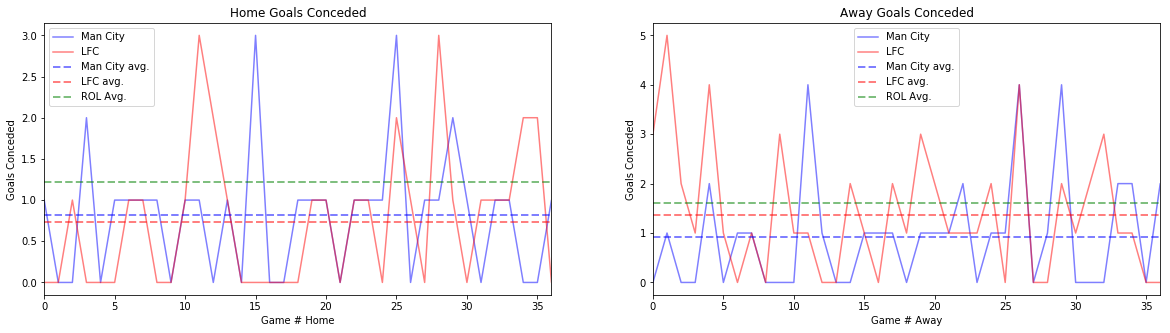

In [19]:
#one of the first things to look at would be goals scored and conceded split by home and away. 
#This would help uncover a trend if a team is potentially really good/bad at home or away


#plot the data
# Comparing Liverpool to Man City
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
#plot both teams home goals
plt.plot(home_goals_city, color='blue', alpha=.5, label="Man City")
plt.plot(home_goals_lfc, color='red', alpha=.5, label="LFC")
#enter our labels for clarity
plt.title("Home Goals Scored")
plt.xlabel("Game # Home")
plt.ylabel("Goals Scored")
#limit the plot to have correct game numbers and get rid of .5 numbers
plt.xlim(0,36)
#add horizontal lines for mean
plt.axhline(np.mean(home_goals_city), color='b', linestyle='dashed', linewidth=2,label='Man City Avg.', alpha=0.5)
plt.axhline(np.mean(home_goals_lfc), color='r', linestyle='dashed', linewidth=2,label='LFC Avg.', alpha=0.5)
plt.axhline(np.mean(home_goals_rol), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()


plt.subplot(1,2,2)
#plot both teams away goals
plt.plot(away_goals_city,color='blue', alpha=.5, label="Man City")
plt.plot(away_goals_lfc, color='red', alpha=.5, label="LFC")
#enter our labels for clarity
plt.title("Away Goals Scored")
plt.xlabel("Game # Away")
plt.ylabel("Goals Scored")
#limit the plot to have correct game numbers and get rid of .5 numbers
plt.xlim(0,36)
#add horizontal lines for mean
plt.axhline(np.mean(away_goals_city), color='b', linestyle='dashed', linewidth=2,label='Man City avg.', alpha=0.5)
plt.axhline(np.mean(away_goals_lfc), color='r', linestyle='dashed', linewidth=2,label='LFC avg.', alpha=0.5)
plt.axhline(np.mean(away_goals_rol), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
#plot both teams home goals conceded
plt.plot(home_goals_against_city, color='blue', alpha=.5, label="Man City")
plt.plot(home_goals_against_lfc, color='red', alpha=.5, label="LFC")
plt.title("Home Goals Conceded")
plt.xlabel("Game # Home")
plt.xlim(0,36)
plt.ylabel("Goals Conceded")
plt.axhline(np.mean(home_goals_against_city), color='b', linestyle='dashed', linewidth=2,label='Man City avg.', alpha=0.5)
plt.axhline(np.mean(home_goals_against_lfc), color='r', linestyle='dashed', linewidth=2,label='LFC avg.', alpha=0.5)
plt.axhline(np.mean(home_goals_against_rol), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()


plt.subplot(1,2,2)
#plot both teams away goals conceded
plt.plot(away_goals_against_city,color='blue', alpha=.5, label="Man City")
plt.plot(away_goals_against_lfc, color='red', alpha=.5, label="LFC")
plt.title("Away Goals Conceded")
plt.xlabel("Game # Away")
plt.xlim(0,36)
plt.ylabel("Goals Conceded")
plt.axhline(np.mean(away_goals_against_city), color='b', linestyle='dashed', linewidth=2,label='Man City avg.', alpha=0.5)
plt.axhline(np.mean(away_goals_against_lfc), color='r', linestyle='dashed', linewidth=2,label='LFC avg.', alpha=0.5)
plt.axhline(np.mean(away_goals_against_rol), color='g', linestyle='dashed', linewidth=2,label='ROL Avg.', alpha=0.5)
plt.legend()

### From looking at the data above, we can conclude that both teams perform better than the rest of the league on average. This doesn't tell us about consistency, though. A good team must be consistent.

In [103]:
#calculate variance and mean
print("Man City")
print("Home Goals - ","variance: ",np.var(home_goals_city),"mean: ", np.mean(home_goals_city))
print("Home Goals Conceded - ","variance: ",np.var(home_goals_against_city),"mean: ", np.mean(home_goals_against_city))
print("Away Goals - ","variance: ",np.var(away_goals_city),"mean: ", np.mean(away_goals_city))
print("Away Goals Conceded - ","variance: ",np.var(away_goals_against_city),"mean: ", np.mean(away_goals_against_city))
print(" ")
print("LFC")
print("Home Goals - ","variance: ",np.var(home_goals_lfc),"mean: ", np.mean(home_goals_lfc))
print("Home Goals Conceded - ","variance: ",np.var(home_goals_against_lfc),"mean: ", np.mean(home_goals_against_lfc))
print("Away Goals - ","variance: ",np.var(away_goals_lfc),"mean: ", np.mean(away_goals_lfc))
print("Away Goals Conceded - ","variance: ",np.var(away_goals_against_lfc),"mean: ", np.mean(away_goals_against_lfc))

print(" ")
print("Rest Of League")
print("Home Goals - ","variance: ",np.var(home_goals_rol),"mean: ", np.mean(home_goals_rol))
print("Home Goals Conceded - ","variance: ",np.var(home_goals_against_rol),"mean: ", np.mean(home_goals_against_rol))
print("Away Goals - ","variance: ",np.var(away_goals_rol),"mean: ", np.mean(away_goals_rol))
print("Away Goals Conceded - ","variance: ",np.var(away_goals_against_rol),"mean: ", np.mean(away_goals_against_rol))



Man City
Home Goals -  variance:  2.5595567867 mean:  2.57894736842
Home Goals Conceded -  variance:  0.571329639889 mean:  0.815789473684
Away Goals -  variance:  1.84764542936 mean:  2.31578947368
Away Goals Conceded -  variance:  1.28324099723 mean:  0.921052631579
 
LFC
Home Goals -  variance:  2.49584487535 mean:  2.36842105263
Home Goals Conceded -  variance:  0.720221606648 mean:  0.736842105263
Away Goals -  variance:  1.93628808864 mean:  1.89473684211
Away Goals Conceded -  variance:  1.65373961219 mean:  1.36842105263
 
Rest Of League
Home Goals -  variance:  1.55860563934 mean:  1.4634502924
Home Goals Conceded -  variance:  1.51331178824 mean:  1.21929824561
Away Goals -  variance:  1.28287977497 mean:  1.0716374269
Away Goals Conceded -  variance:  1.75227420403 mean:  1.61111111111
